## AmirMohammad Ebrahiminasab - German Traffic Sign Model

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amirebrahiminasab","key":"f5ea3a6c93484c7a343c4382559fb1c5"}'}

In [3]:
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 612M/612M [00:29<00:00, 23.6MB/s]
100% 612M/612M [00:29<00:00, 22.0MB/s]


In [4]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [5]:
import pandas as pd

In [6]:
meta = pd.read_csv("Meta.csv")
meta.head(10)

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


In [7]:
train = pd.read_csv("Train.csv")
train.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
5,31,27,6,5,26,22,20,Train/20/00020_00000_00005.png
6,31,28,6,6,26,23,20,Train/20/00020_00000_00006.png
7,31,28,6,6,26,23,20,Train/20/00020_00000_00007.png
8,31,29,5,6,26,24,20,Train/20/00020_00000_00008.png
9,34,32,6,6,29,26,20,Train/20/00020_00000_00009.png


In [8]:
test = pd.read_csv('Test.csv')
test.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [9]:
train.shape[0]

39209

In [10]:
meta.shape[0]

43

In [11]:
test.shape[0]

12630

In [12]:
train.Path

,Path
0,Train/20/00020_00000_00000.png
1,Train/20/00020_00000_00001.png
2,Train/20/00020_00000_00002.png
3,Train/20/00020_00000_00003.png
4,Train/20/00020_00000_00004.png
...,...
39204,Train/42/00042_00007_00025.png
39205,Train/42/00042_00007_00026.png
39206,Train/42/00042_00007_00027.png
39207,Train/42/00042_00007_00028.png


In [13]:
test.Path

,Path
0,Test/00000.png
1,Test/00001.png
2,Test/00002.png
3,Test/00003.png
4,Test/00004.png
...,...
12625,Test/12625.png
12626,Test/12626.png
12627,Test/12627.png
12628,Test/12628.png


In [14]:
train_img = list(train.Path)
train_label = list(train.ClassId)
test_img = list(test.Path)
test_label =  list(test.ClassId)
train_img[0]

'Train/20/00020_00000_00000.png'

In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [16]:
def preprocess_img(img_path: str):
    img = load_img(img_path, target_size=(64, 64))
    img = img_to_array(img)
    img/=255
    return img


In [17]:
X_train, X_test, y_train, y_test = [], [], [], []
for idx in range(len(train_img)):
  X_train.append(preprocess_img(train_img[idx]))
  y_train.append(train_label[idx])

for idx in range(len(test_img)):
  X_test.append(preprocess_img(test_img[idx]))
  y_test.append(test_label[idx])


In [18]:
import numpy as np

In [19]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [20]:
from keras.utils import to_categorical

In [21]:
y_train = to_categorical(y_train, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

In [22]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense, ReLU

## Self made Model

In [59]:
model = Sequential([
    Conv2D(16, 3, padding='same', input_shape=(64,64, 3)),
    BatchNormalization(),
    ReLU(),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(32, 16, padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(32, 32, padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(units=500, activation='relu'),
    Dropout(0.3),
    Dense(units=43, activation='softmax')

])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │         131,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │       1,048,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │       1,024,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,226,523 (8.49 MB)

 Trainable params: 2,226,363 (8.49 MB)

 Non-trainable params: 160 (640.00 B)

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(X_train, y_train, batch_size=32, epochs=9, validation_data=(X_test, y_test))

Epoch 1/9
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.2963 - loss: 2.5587 - val_accuracy: 0.7450 - val_loss: 0.7877
Epoch 2/9
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8721 - loss: 0.3936 - val_accuracy: 0.8908 - val_loss: 0.3786
Epoch 3/9
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9447 - loss: 0.1712 - val_accuracy: 0.9246 - val_loss: 0.2850
Epoch 4/9
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9652 - loss: 0.1097 - val_accuracy: 0.9185 - val_loss: 0.3048
Epoch 5/9
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9769 - loss: 0.0749 - val_accuracy: 0.9320 - val_loss: 0.2793
Epoch 6/9
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9809 - loss: 0.0598 - val_accuracy: 0.9375 - val_loss: 0.2347
Epoch 7/9
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9857 - loss: 0.0485 - val_accuracy: 0.9436 - val_loss: 0.2380
Epoch 8/9
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9884 - loss: 0

In [62]:
test_loss, test_acc = model.evaluate(X_test, y_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9392 - loss: 0.2841


In [63]:
print(f"Test loss is: {test_loss}")
print(f"Test Accuracy is: {test_acc*100:.2f}%")

Test loss is: 0.2712250053882599
Test Accuracy is: 94.14%


## Confusion Matrix for self made model

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [65]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


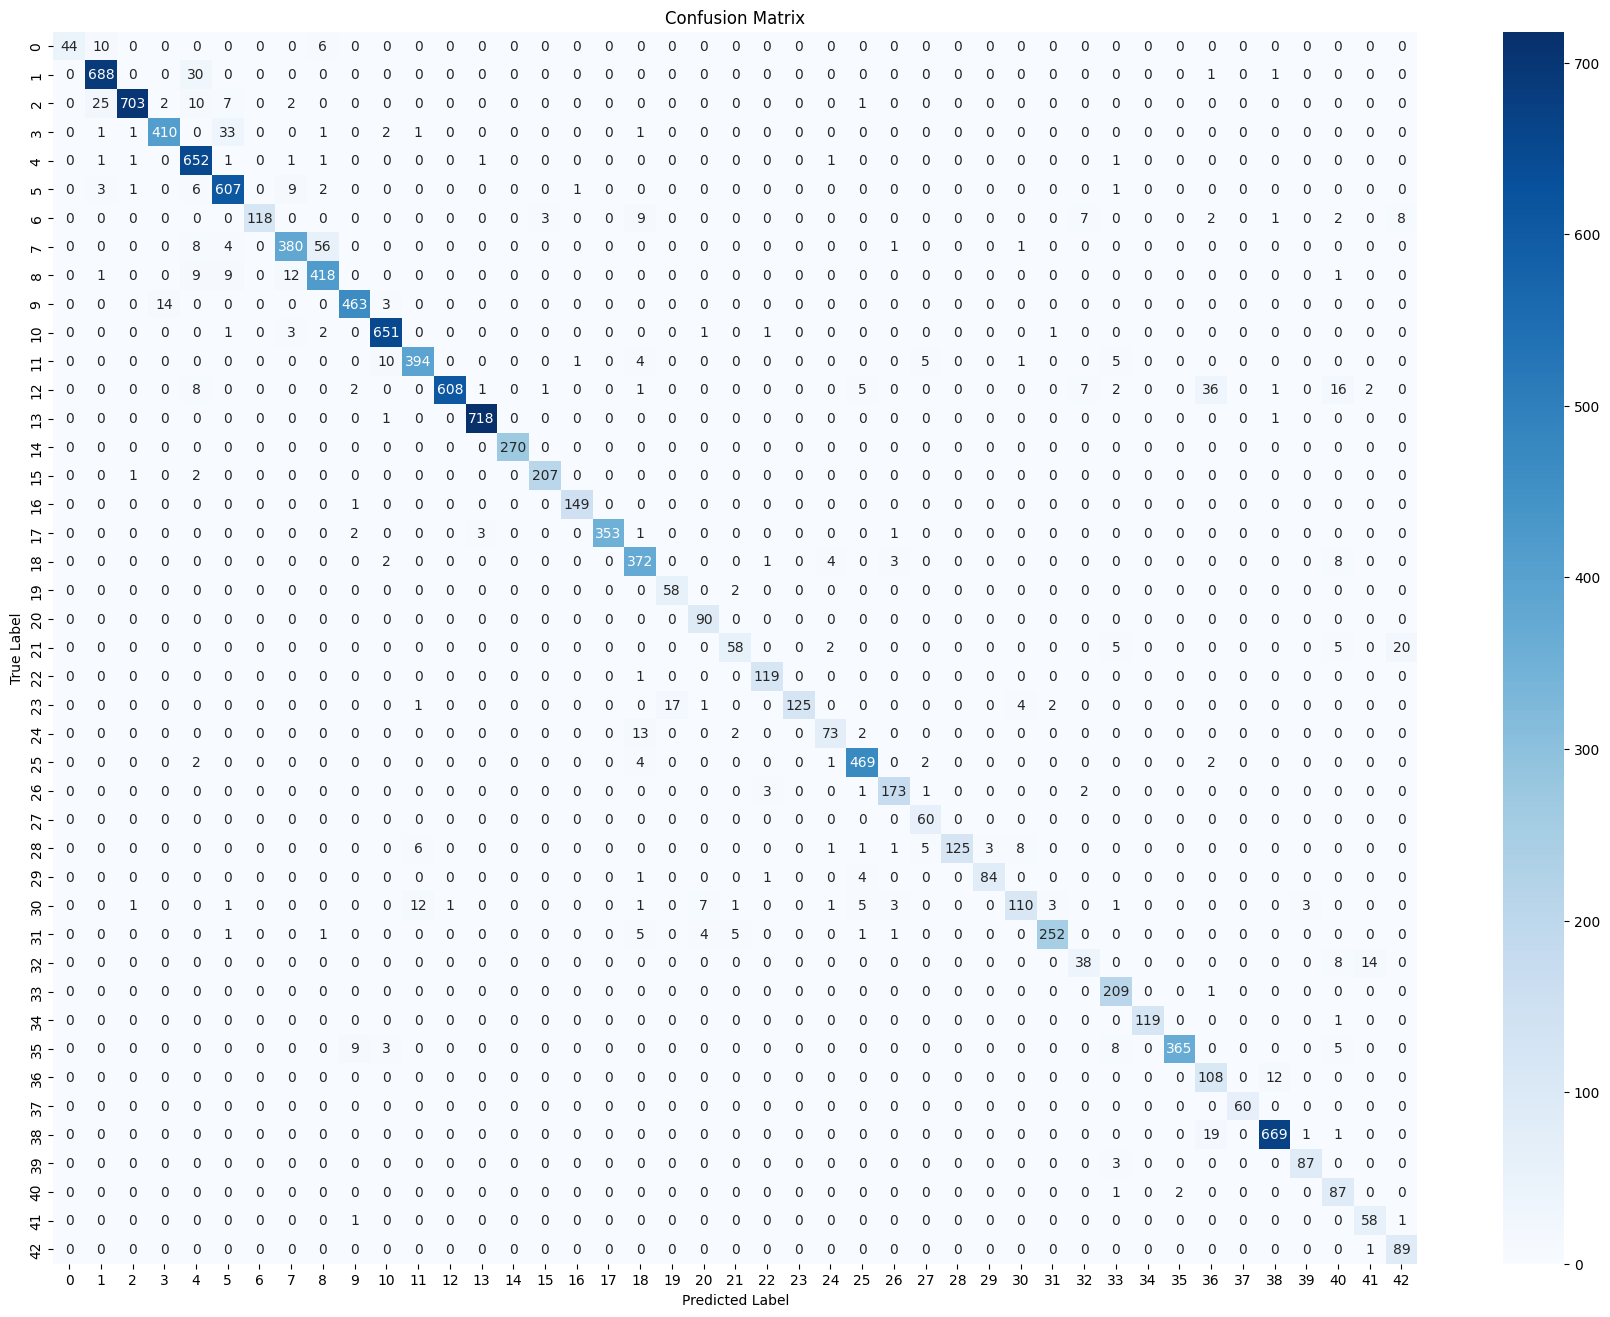

In [66]:
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(22, 16))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(test_label), yticklabels=set(test_label))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Using a Pre Trained model.

In [28]:
from keras.applications import ResNet50

In [29]:
model = ResNet50(weights='imagenet', include_top=False , input_shape=(64, 64, 3))
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 70, 70, 3)      │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 32, 32, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 32, 32, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 32, 32, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 34, 34, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 16, 16, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 16, 16, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 16, 16, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 16, 16, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 16, 16, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [30]:
lay1 = Flatten()(model.output)
lay2 = Dense(500, activation='relu')(lay1)
out = Dense(43, activation='softmax')(lay2)

In [32]:
from keras import Model

In [34]:
model = Model(inputs=model.input, outputs=out)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 70, 70, 3)      │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 32, 32, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 32, 32, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 32, 32, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 34, 34, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 16, 16, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 16, 16, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 16, 16, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 16, 16, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 16, 16, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 27,705,755 (105.69 MB)

 Trainable params: 27,652,635 (105.49 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 159s 81ms/step - accuracy: 0.7846 - loss: 0.9890 - val_accuracy: 0.9279 - val_loss: 0.2669
Epoch 2/3
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 85s 57ms/step - accuracy: 0.9658 - loss: 0.1664 - val_accuracy: 0.9347 - val_loss: 0.2832
Epoch 3/3
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9843 - loss: 0.0658 - val_accuracy: 0.8917 - val_loss: 0.3983


In [37]:
test_loss, test_acc = model.evaluate(X_test, y_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8920 - loss: 0.3999


In [38]:
print(f"Test loss is: {test_loss}")
print(f"Test Accuracy is: {test_acc*100:.2f}%")

Test loss is: 0.3983498811721802
Test Accuracy is: 89.17%


## Comparison

In [39]:
import matplotlib.pyplot as plt

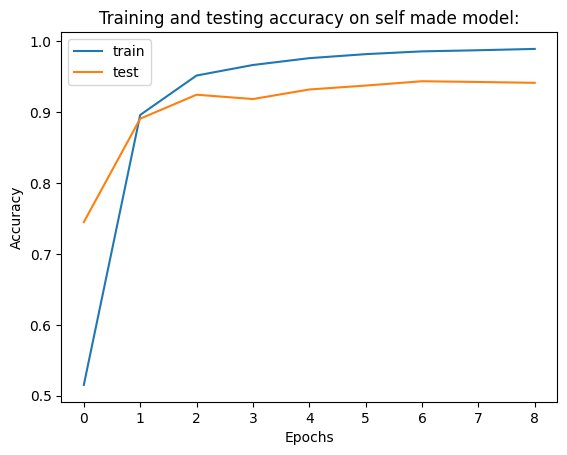

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and testing accuracy on self made model:')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

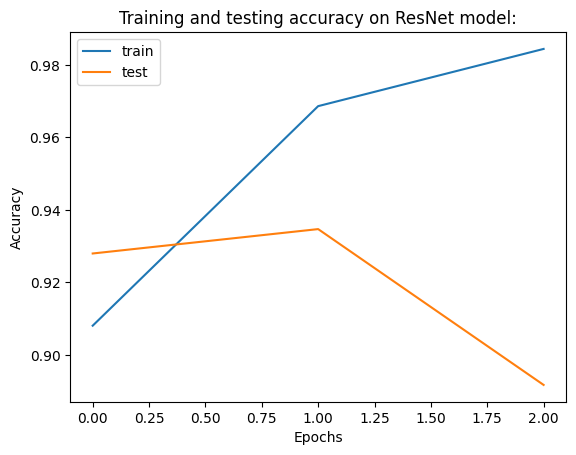

In [49]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Training and testing accuracy on ResNet model:')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

## confusion matrix for ResNet Model.

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [52]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step


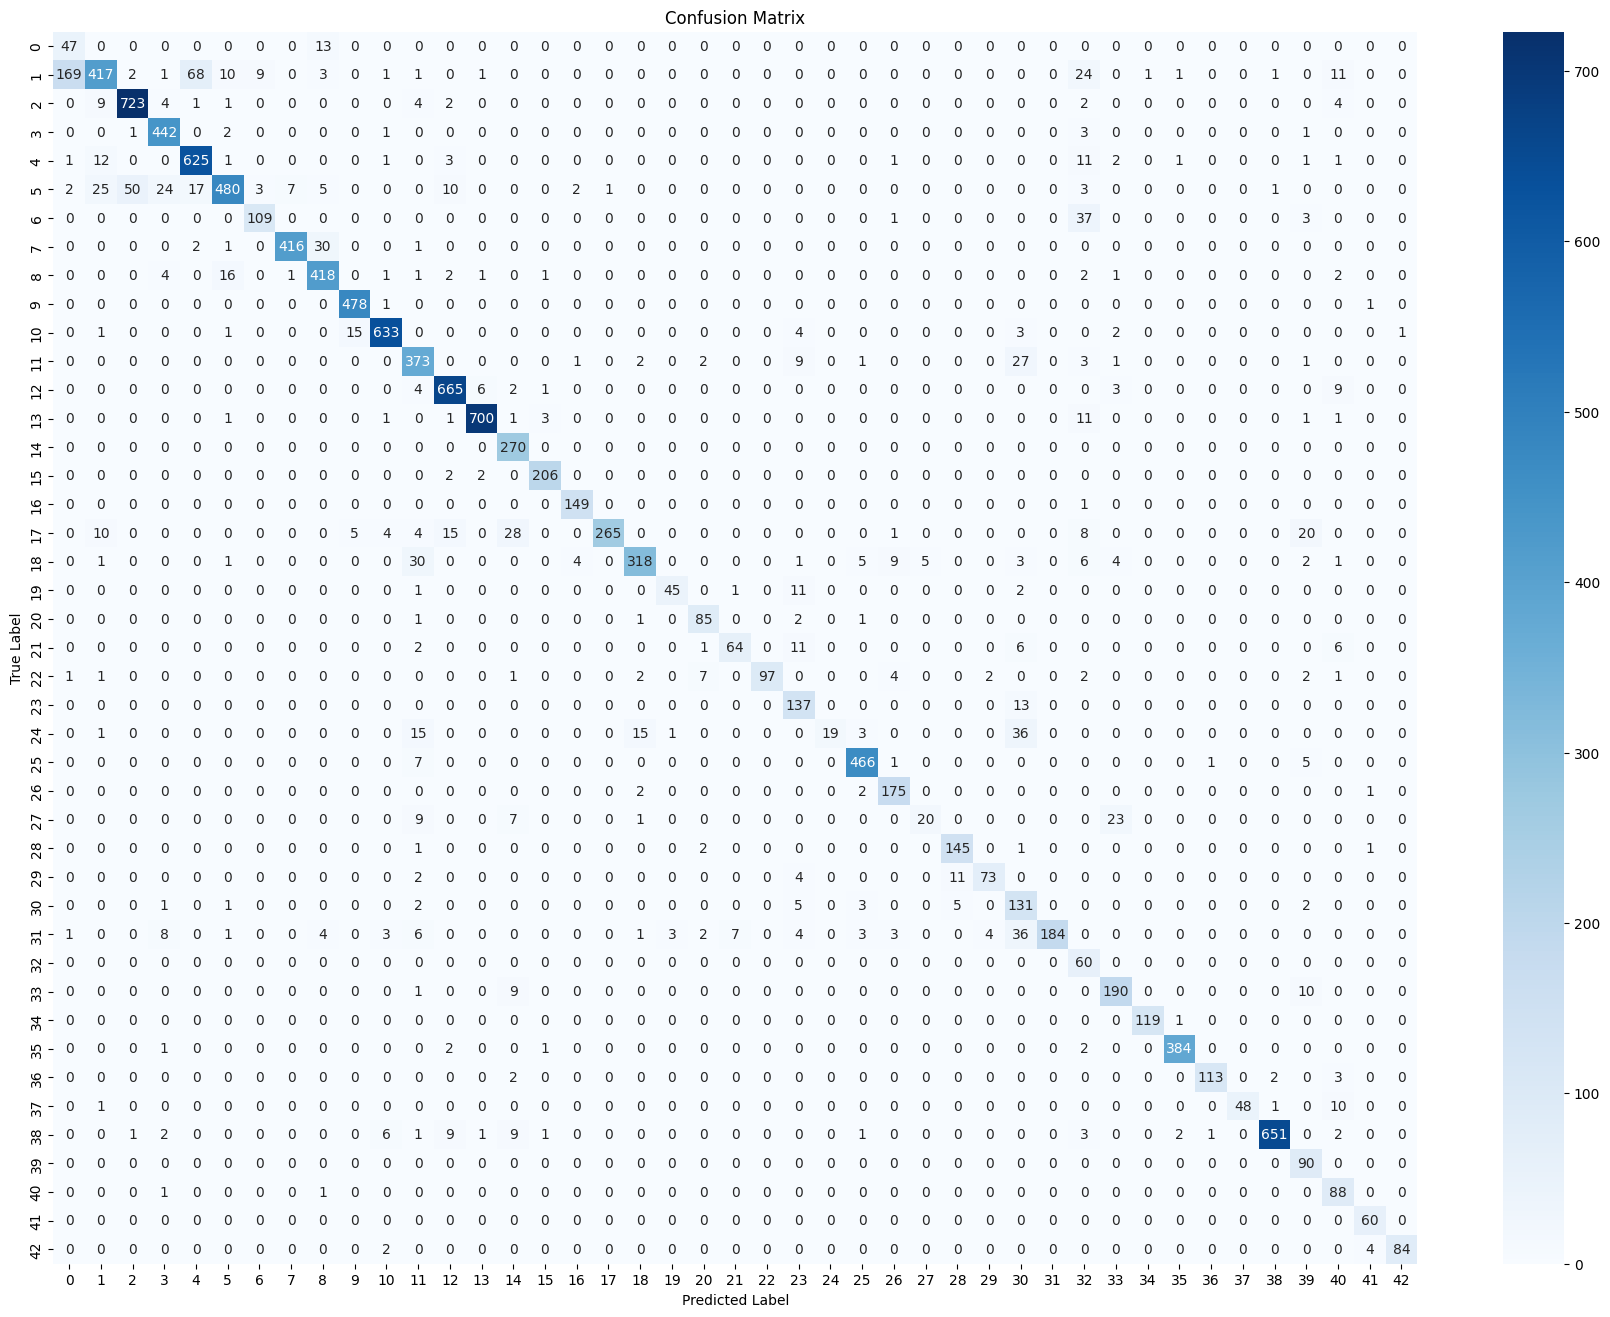

In [58]:
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(22, 16))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(test_label), yticklabels=set(test_label))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### As you can see based on the cofusion matrix for both models, the self made model has a much better accuracy on labels 1 and 5, which the resNet fine-tuned model seems to have some problems with it.

### Note that the fine-tuned ResNet model might be slightly overfit, Hence slight miss accuracy.